Applying the regressors to output infrared fluxes in the whole atmosphere. This is using TOASW, temp surface temp.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
DS_a = xr.open_dataset('af') #dataset of auxhist
DS_w = xr.open_dataset('wf') #dataset of wrfout

In [3]:
#Temperature:
T = (DS_w.T.values + DS_w.T0) * ((DS_w.P.values + DS_w.PB.values)/DS_w.P0)**(DS_w.R_D/DS_w.CP)
T.shape

(71, 52, 36, 72)

In [4]:
albedo = DS_a.ALBEDO.values 
albedo.shape #days, latitude, longtitude

(71, 36, 72)

In [5]:
d_c = DS_a.TAU_OD.values
d_c.shape 

(71, 52, 36, 72)

In [6]:
st = DS_w.TSK.values
st.shape

(71, 36, 72)

In [7]:
tsf = DS_a.TOASW.values #top solar flux
tsf.shape

(71, 36, 72)

In [8]:
msf = DS_a.DOWNIRFLUX.values #whole atmosphere down infrared flux
msf.shape

(71, 53, 36, 72)

Let's combine the data together for ten time samples, with full latitude and longitude:

In [9]:
e_t = [] #full input and output
#input:
for k in range(10): #10 days
    for i in range(36):
        for j in range(72):
            input_array = list(T[k,:,i,j]) #start with temp profile
            input_array.append(albedo[k,i,j]) #add albedo
            input_array += list(d_c[k,:,i,j]) #add dust profile
            input_array.append(st[k,i,j])#add surface temp
            input_array.append(tsf[k,i,j]) #add top solar flux,
            input_array += list(msf[k,:,i,j])            
            e_t.append(input_array) #appends input to input array

In [10]:
e_t = np.array(e_t)
e_t.shape

(25920, 160)

In [11]:
pd.DataFrame(e_t)

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,227.318848,227.260056,227.165466,227.046188,226.925751,226.804108,226.681244,226.557205,226.431808,226.305176,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,227.330124,227.271408,227.176788,227.057510,226.937042,226.815399,226.692535,226.568436,226.443069,226.316422,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,227.336258,227.277496,227.182861,227.063614,226.943130,226.821503,226.698608,226.574509,226.449142,226.322495,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,227.337128,227.278336,227.183746,227.064468,226.943985,226.822327,226.699493,226.575378,226.450012,226.323349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,227.332764,227.273987,227.179382,227.060089,226.939621,226.818008,226.695114,226.571045,226.445663,226.319031,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,195.926605,196.176559,196.233871,196.553436,198.060699,198.145294,198.186966,198.237289,198.218109,198.195663,...,14.082313,14.235906,14.335536,14.428726,14.513978,14.593282,14.658659,14.641423,14.586281,14.589592
25916,196.206619,196.444473,196.495056,196.764801,198.152267,198.199341,198.222931,198.258759,198.227005,198.192764,...,14.078302,14.233523,14.334620,14.429870,14.517577,14.599743,14.669615,14.662907,14.621727,14.635448
25917,196.483841,196.709473,196.754776,196.977203,198.241196,198.251846,198.258133,198.279633,198.235596,198.189697,...,14.074153,14.230990,14.333535,14.430823,14.520968,14.605946,14.680243,14.684244,14.657230,14.681223
25918,196.756317,196.969727,197.011292,197.189270,198.327026,198.302643,198.292480,198.299988,198.244049,198.186783,...,14.070003,14.228442,14.332409,14.431698,14.524240,14.611956,14.690571,14.705386,14.692632,14.726670


In [12]:
e_d = pd.DataFrame(e_t) 
e_d = e_d[e_d.iloc[:,106] != 0] #remove 0 tsf

In [13]:
e_d

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
2592,151.206253,152.076157,152.608749,157.155060,162.428177,165.732498,167.803940,169.195404,170.080673,170.529678,...,5.315413,5.311390,5.300332,5.276111,5.223905,5.132736,4.986982,4.763958,4.497736,4.292701
2593,150.954300,151.691101,152.145660,157.159012,162.278000,165.502228,167.536957,168.901138,169.782501,170.242050,...,5.288033,5.281506,5.268859,5.243656,5.191796,5.102499,4.960560,4.744291,4.476749,4.266223
2594,150.716537,151.334015,151.737946,157.226288,162.168686,165.298523,167.286560,168.617004,169.491531,169.961334,...,5.259313,5.250432,5.236313,5.210284,5.159063,5.072120,4.934664,4.726003,4.457614,4.241215
2595,150.494980,151.007828,151.388901,157.356400,162.101135,165.123062,167.054810,168.345337,169.210220,169.689880,...,5.229507,5.218440,5.202975,5.176274,5.125974,5.041842,4.909494,4.709233,4.440467,4.217840
2596,150.291397,150.715195,151.101410,157.548309,162.075958,164.977295,166.843628,168.088318,168.940826,169.429901,...,5.198869,5.185797,5.169122,5.141908,5.092796,5.011900,4.885241,4.694120,4.425447,4.196262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,195.926605,196.176559,196.233871,196.553436,198.060699,198.145294,198.186966,198.237289,198.218109,198.195663,...,14.082313,14.235906,14.335536,14.428726,14.513978,14.593282,14.658659,14.641423,14.586281,14.589592
25916,196.206619,196.444473,196.495056,196.764801,198.152267,198.199341,198.222931,198.258759,198.227005,198.192764,...,14.078302,14.233523,14.334620,14.429870,14.517577,14.599743,14.669615,14.662907,14.621727,14.635448
25917,196.483841,196.709473,196.754776,196.977203,198.241196,198.251846,198.258133,198.279633,198.235596,198.189697,...,14.074153,14.230990,14.333535,14.430823,14.520968,14.605946,14.680243,14.684244,14.657230,14.681223
25918,196.756317,196.969727,197.011292,197.189270,198.327026,198.302643,198.292480,198.299988,198.244049,198.186783,...,14.070003,14.228442,14.332409,14.431698,14.524240,14.611956,14.690571,14.705386,14.692632,14.726670


This function splits the training data, into n_split groups, according to percentiles of a value located at special index s_index. Then, it trains n_split regressors, each on its respective group, and then outputs these. The ith regressor is trained on the data containing 100(i/n_split) to 100((i+1)/n_split) percentiles of the value located at s_index. The special index is set as the top solar flux, which is the last index of the input data.

In [14]:
from sklearn.linear_model import LinearRegression


def sat(training_data, n_split, s_index): 
    regressor_list = []
    training_data = np.array(training_data)
    
    for i in range(n_split): #splitting training data
        upper_bound = np.percentile(training_data[:,s_index], (i+1) * 100/n_split)
        lower_bound = np.percentile(training_data[:,s_index], i * 100/n_split)
        i_data = training_data[training_data[:,s_index] < upper_bound]
        i_data = i_data[i_data[:,s_index] >= lower_bound]
        train_in = i_data[:,:s_index+1] #training input
        train_out = i_data[:,s_index+1:] #training output
        lri = LinearRegression() #linear regression i
        lri.fit(train_in,train_out)
        regressor_list.append(lri)
    
    return regressor_list

This function predicts the output according to the n_split regressors, where the ith regressor is used on the data containing 100(i/n_split) to 100((i+1)/n_split) percentiles of the value located at s_index.

In [15]:
def s_predict(in_data, reg_list, s_index): #predict the output using previously obtained linear regressor list
    in_data = np.array(in_data)
    out_data = []
    for instance in in_data:
        for i in range(len(reg_list)):
            upper_bound = np.percentile(in_data[:,s_index], (i+1) * 100/len(reg_list))
            lower_bound = np.percentile(in_data[:,s_index], i * 100/len(reg_list))
            if instance[s_index] < upper_bound and instance[s_index] >= lower_bound:
                out_data.append(reg_list[i].predict(instance[:s_index+1].reshape(1,-1))[0]) #predicts using a certain regressor
        if(instance[s_index] == np.max(in_data[:,s_index])): #the search right above ignores the absolute maximum element
            out_data.append(reg_list[-1].predict(instance[:s_index+1].reshape(1,-1))[0]) #uses lin reg for largest elements
    return np.array(out_data)   

In [16]:
lr_list = sat(e_d, 10, 106) #linear regressor list, let's try 10 regressors
custom_out = s_predict(e_d, lr_list, 106)

In [17]:
#rlr_list = satr(e_d, 10, 52) #relative error minimizing linear regressor list
#custom_out2 = s_predict(e_d, rlr_list, 52)

In [18]:
total_in = e_d.iloc[:,:107] #total input
total_out = e_d.iloc[:,107:] #total output

In [19]:
total_out.shape

(11894, 53)

In [20]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(total_out, custom_out)
lin_rmse = np.sqrt(lin_mse)
print("Error for RMSE minimizing regressors:" + str(lin_rmse)) #great!
#lin_rel = mean_squared_error(total_out, custom_out2)
#lin_rel = np.sqrt(lin_rel)
#print("Error for relative error minimizing regressors:" + str(lin_rel)) #slightly higher but still pretty low

Error for RMSE minimizing regressors:0.38099706


In [21]:
np.average(total_out)

6.8496885

Area integration of error:

In [22]:
def int_err(pred, real, real_in, r): 
    areas = []
    for i in range(len(real)):
        dA =  -r**2 * np.sin((np.pi/36)*((real_in.index[i]//72)%36)) * (np.pi/36) * (np.pi/36)  #area increment
        areas.append(dA)
    areas = np.array(areas)
    areas2 = np.zeros([len(areas),real.shape[1]])
    for i in range(53):
        areas2[:,i] = areas #need height dimension too
    return np.sum((np.array(pred) - np.array(real))*areas2)

In [23]:
err1 = int_err(custom_out, total_out, total_in, 3.39e6) #the integral of the error for the whole atmosphere
np.array(err1)/(1.44e14)/10/53 

-0.00020699457863229798

The error is divided by surface area of mars, number of time samples, number of atmosphere to get normalized flux error for single time sample, for a single cell. This is pretty good!

In [24]:
#err2 = int_err(custom_out2, total_out, total_in, 3.39e6) #the integral of the error
#np.array(err2)/(1.44e14)/10 #about 25 times larger, still really small! This is in W/m^2 units.

In [25]:
total_in

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
2592,151.206253,152.076157,152.608749,157.155060,162.428177,165.732498,167.803940,169.195404,170.080673,170.529678,...,6.870778e-08,4.828668e-08,3.302351e-08,2.181589e-08,1.379160e-08,8.190756e-09,4.479549e-09,2.268331e-09,146.526855,3.133222
2593,150.954300,151.691101,152.145660,157.159012,162.278000,165.502228,167.536957,168.901138,169.782501,170.242050,...,6.877530e-08,4.833389e-08,3.305554e-08,2.183677e-08,1.380450e-08,8.198081e-09,4.483181e-09,2.269765e-09,146.533554,3.225646
2594,150.716537,151.334015,151.737946,157.226288,162.168686,165.298523,167.286560,168.617004,169.491531,169.961334,...,6.880115e-08,4.835196e-08,3.306780e-08,2.184476e-08,1.380943e-08,8.200886e-09,4.484573e-09,2.270314e-09,146.536072,3.133214
2595,150.494980,151.007828,151.388901,157.356400,162.101135,165.123062,167.054810,168.345337,169.210220,169.689880,...,6.878514e-08,4.834077e-08,3.306021e-08,2.183981e-08,1.380637e-08,8.199148e-09,4.483712e-09,2.269974e-09,146.534378,2.856627
2596,150.291397,150.715195,151.101410,157.548309,162.075958,164.977295,166.843628,168.088318,168.940826,169.429901,...,6.872747e-08,4.830045e-08,3.303285e-08,2.182198e-08,1.379536e-08,8.192893e-09,4.480609e-09,2.268749e-09,146.528503,2.397990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,195.926605,196.176559,196.233871,196.553436,198.060699,198.145294,198.186966,198.237289,198.218109,198.195663,...,1.091246e-07,7.654454e-08,5.219346e-08,3.431266e-08,2.151059e-08,1.257493e-08,6.654015e-09,3.126207e-09,194.218506,166.324509
25916,196.206619,196.444473,196.495056,196.764801,198.152267,198.199341,198.222931,198.258759,198.227005,198.192764,...,1.091595e-07,7.656890e-08,5.220998e-08,3.432344e-08,2.151725e-08,1.257871e-08,6.655889e-09,3.126946e-09,194.540924,167.173706
25917,196.483841,196.709473,196.754776,196.977203,198.241196,198.251846,198.258133,198.279633,198.235596,198.189697,...,1.091901e-07,7.659027e-08,5.222449e-08,3.433289e-08,2.152309e-08,1.258202e-08,6.657535e-09,3.127596e-09,194.864700,167.877502
25918,196.756317,196.969727,197.011292,197.189270,198.327026,198.302643,198.292480,198.299988,198.244049,198.186783,...,1.092166e-07,7.660883e-08,5.223708e-08,3.434110e-08,2.152816e-08,1.258490e-08,6.658964e-09,3.128160e-09,195.188644,168.430542


In [33]:
np.array(total_out)[153,52]

9.557702

## Plotting data:

In [26]:
all_indices = total_in.index
ti_indices = all_indices[all_indices > 5*36*72] 
ti_indices = ti_indices[ti_indices < 6 *36*72] 
ti_indices #ith time snapshot indices for latitude/longtitude map, currently set to 6th time snapshot

Int64Index([13104, 13105, 13106, 13107, 13108, 13109, 13110, 13111, 13112,
            13170,
            ...
            15542, 15543, 15544, 15545, 15546, 15547, 15548, 15549, 15550,
            15551],
           dtype='int64', length=1324)

In [34]:
total_out = np.array(total_out)
full_out_contour = np.full((36, 72), np.nan)
full_pred_contour = np.full((36, 72), np.nan)
#full_pred_contour2 = np.full((36, 72), np.nan)
for index in ti_indices:
    lat_point = index//72 - 36*5
    long_point = index%72 - 1*72
    full_out_contour[lat_point][long_point] = total_out[np.where(all_indices == index), 25] #choose some middle layer
    full_pred_contour[lat_point][long_point] = custom_out[np.where(all_indices == index), 25]
    #full_pred_contour2[lat_point][long_point] = custom_out2[np.where(all_indices == index)]

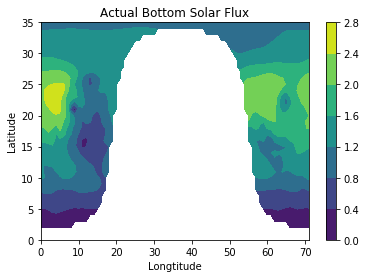

<Figure size 432x288 with 0 Axes>

In [35]:
plt.contourf(full_out_contour)
plt.colorbar()
plt.title("Actual Bottom Solar Flux")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Actual")

### Plots for RMSE minimizing regressors:

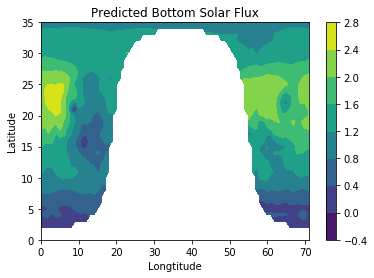

<Figure size 432x288 with 0 Axes>

In [36]:
plt.contourf(full_pred_contour)
plt.colorbar()
plt.title("Predicted Bottom Solar Flux")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Predicted")

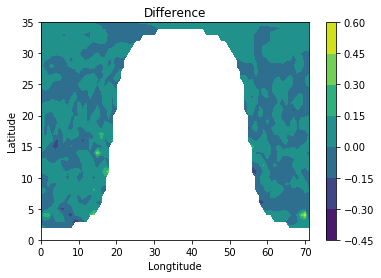

In [37]:
plt.contourf(full_pred_contour - full_out_contour)
plt.colorbar()
plt.title("Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()

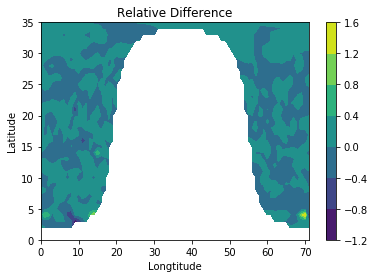

In [38]:
plt.contourf((full_pred_contour - full_out_contour)/full_out_contour)
plt.colorbar()
plt.title("Relative Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show() #some massive relative errors at the edge

### Long-Height Plots at equator:

In [51]:
all_indices = total_in.index
ti_indices = all_indices[all_indices >= 5*36*72 + 18*72] 
ti_indices = ti_indices[ti_indices < 5*36*72 + 19*72] 
ti_indices #ith time snapshot indices for longtitude/height map, currently set to 6th time snapshot

Int64Index([14256, 14257, 14258, 14259, 14260, 14261, 14262, 14263, 14264,
            14265, 14266, 14267, 14268, 14269, 14270, 14271, 14272, 14273,
            14274, 14275, 14311, 14312, 14313, 14314, 14315, 14316, 14317,
            14318, 14319, 14320, 14321, 14322, 14323, 14324, 14325, 14326,
            14327],
           dtype='int64')

In [52]:
total_out = np.array(total_out)
height_out_contour = np.full((53, 72), np.nan)
height_pred_contour = np.full((53, 72), np.nan) #longtitude-height contours
for index in ti_indices:
    long_point = index%72
    height_out_contour[:,long_point] = total_out[np.where(all_indices == index)][0][::-1]
    height_pred_contour[:,long_point] = custom_out[np.where(all_indices == index)][0][::-1] #flips the height to look better

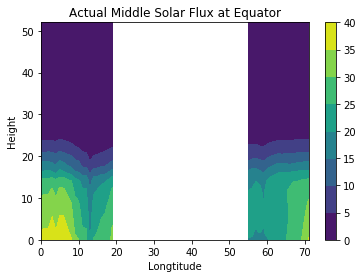

In [53]:
plt.contourf(height_out_contour)
plt.colorbar()
plt.title("Actual Middle Solar Flux at Equator")
plt.xlabel("Longtitude")
plt.ylabel("Height")
plt.show()

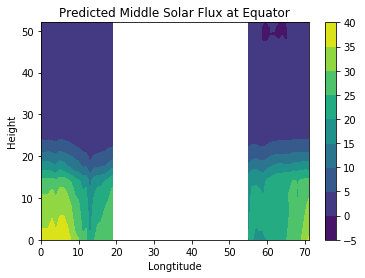

In [54]:
plt.contourf(height_pred_contour)
plt.colorbar()
plt.title("Predicted Middle Solar Flux at Equator")
plt.xlabel("Longtitude")
plt.ylabel("Height")
plt.show()

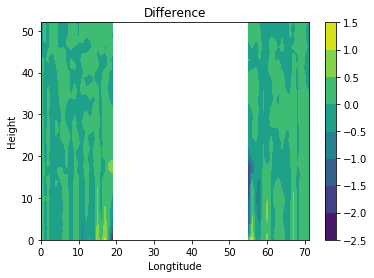

In [55]:
plt.contourf(height_pred_contour - height_out_contour)
plt.colorbar()
plt.title("Difference")
plt.xlabel("Longtitude")
plt.ylabel("Height")
plt.show()

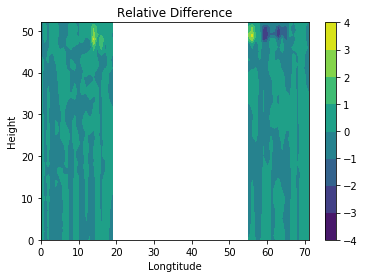

In [56]:
plt.contourf((height_pred_contour - height_out_contour)/height_out_contour)
plt.colorbar()
plt.title("Relative Difference")
plt.xlabel("Longtitude")
plt.ylabel("Height")
plt.show()